<a href="https://colab.research.google.com/github/SasiwimonV/bsc_dpdm22/blob/main/%5Bdataprep2%5D_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
# Load these libraries
import pandas as pd
import json




In [87]:
from google.colab import drive
drive.mount('/content/drive')  # เชื่อม drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
with open('/content/drive/MyDrive/bsc_DPDM_data/สำเนาของ 7-eleven.json') as json_file:  #with openเป็นการเข้าไปดูที่ไฟล์เลย
 this_json = json.loads(json_file.read())                                      

In [89]:
list(this_json.keys()) [:10]

['1', '4', '6', '7', '9', '11', '16', '17', '18', '19']

In [90]:
len(this_json) #ต้องการ location ของ 7-11 ว่าอยู่ห่างจากบ้านกี่ 7-11

3653

In [91]:
this_json['6'] # เรียกดู id ที่ 6

[{'business_status': 'OPERATIONAL',
  'geometry': {'location': {'lat': 16.0603149, 'lng': 102.7264856},
   'viewport': {'northeast': {'lat': 16.06160307989272,
     'lng': 102.7278208298927},
    'southwest': {'lat': 16.05890342010728, 'lng': 102.7251211701073}}},
  'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/shopping-71.png',
  'icon_background_color': '#4B96F3',
  'icon_mask_base_uri': 'https://maps.gstatic.com/mapfiles/place_api/icons/v2/convenience_pinlet',
  'name': '7-Eleven',
  'opening_hours': {'open_now': True},
  'photos': [{'height': 3072,
    'html_attributions': ['<a href="https://maps.google.com/maps/contrib/100135907463246314962">nuttapong chinnapuk</a>'],
    'photo_reference': 'ARywPAIuwYgKEeh9_5vpztMT_JbNv0OakveKoYeKCVvX2RyHmpDJw1w05XJIVVx9w5h9Aoai9Gb67AywD7szMyKpXsSzRol2DkngoztlEQu6goN6W2TsbB45jN-38BigXeivHTE4go3fzzTT5urf1wmSYgGzWw4g2IeDHCXM1oHEXvmTRk0Y',
    'width': 1728}],
  'place_id': 'ChIJzbBjEk2BGDER4YEKqD5kwlI',
  'rating': 4,
  'refe

In [92]:
#วนลูปหาตำแหน่งที่ตั้งของ id 6
check1 = list()
for row in this_json['6']:
    check1.append(row['geometry']['location'])
check1 

[{'lat': 16.0603149, 'lng': 102.7264856},
 {'lat': 16.0564741, 'lng': 102.7268436},
 {'lat': 16.0595413, 'lng': 102.7294307},
 {'lat': 16.0751998, 'lng': 102.7356017},
 {'lat': 16.070648, 'lng': 102.7344055},
 {'lat': 16.0582995, 'lng': 102.7360953},
 {'lat': 16.0573901, 'lng': 102.7192322}]

In [93]:
#วนลูปหาตำแหน่งที่ตั้งของทุก id    // ดูว่ามีเซเว่นอยู่ตรงไหนบ้าง
seven_id = {} #สร้าง dict ขึ้นมา  // เพื่อรวบรวม list ของเเต่ละโลเคชั่นไว้// เก็บไว้ เพื่อจะได้เรียกดูได้ว่าอันไหนที่มีไอดีเหมือนกันบ้้าง
for t in this_json:
    l = list()  
    for x in this_json[t]:
        l.append(x['geometry']['location'])
   # print(t) # t = id
    #print(l)
    seven_id[t] = l  # dict id = t สมาชิกคือ l

In [94]:
seven_id # ได้ key ที่มีสมาชิกเป็นตำแหน่ง

{'1': [],
 '4': [],
 '6': [{'lat': 16.0603149, 'lng': 102.7264856},
  {'lat': 16.0564741, 'lng': 102.7268436},
  {'lat': 16.0595413, 'lng': 102.7294307},
  {'lat': 16.0751998, 'lng': 102.7356017},
  {'lat': 16.070648, 'lng': 102.7344055},
  {'lat': 16.0582995, 'lng': 102.7360953},
  {'lat': 16.0573901, 'lng': 102.7192322}],
 '7': [],
 '9': [],
 '11': [{'lat': 15.809535, 'lng': 102.6069684},
  {'lat': 15.8193062, 'lng': 102.6012589},
  {'lat': 15.8125848, 'lng': 102.6009202},
  {'lat': 15.8102763, 'lng': 102.5985417},
  {'lat': 15.8095537, 'lng': 102.5879272},
  {'lat': 15.7970035, 'lng': 102.6075296}],
 '16': [{'lat': 16.1340329, 'lng': 102.5331697},
  {'lat': 16.1294298, 'lng': 102.540669}],
 '17': [{'lat': 16.4052438, 'lng': 102.7823961},
  {'lat': 16.3898169, 'lng': 102.8053144},
  {'lat': 16.4221806, 'lng': 102.8047853},
  {'lat': 16.4083692, 'lng': 102.7948258},
  {'lat': 16.4053255, 'lng': 102.7746538}],
 '18': [{'lat': 16.4506978, 'lng': 102.7955315},
  {'lat': 16.445794, 'lng':

In [95]:
l # ตห. 7-11 ของบ้าน id สุดท้าย

[{'lat': 13.7374346, 'lng': 100.6267268},
 {'lat': 13.7356967, 'lng': 100.6189741},
 {'lat': 13.754974, 'lng': 100.613215},
 {'lat': 13.7607113, 'lng': 100.6292369},
 {'lat': 13.7568211, 'lng': 100.6445227},
 {'lat': 13.7522027, 'lng': 100.6193615},
 {'lat': 13.7366139, 'lng': 100.6313462},
 {'lat': 13.7367845, 'lng': 100.6241795},
 {'lat': 13.7563129, 'lng': 100.6131975},
 {'lat': 13.7523059, 'lng': 100.6182354},
 {'lat': 13.7519672, 'lng': 100.6357339},
 {'lat': 13.7420702, 'lng': 100.6326465},
 {'lat': 13.7623488, 'lng': 100.644072},
 {'lat': 13.7528219, 'lng': 100.6206503},
 {'lat': 13.7609686, 'lng': 100.631794},
 {'lat': 13.74039, 'lng': 100.6252888},
 {'lat': 13.74231, 'lng': 100.6247883},
 {'lat': 13.7602053, 'lng': 100.6220398},
 {'lat': 13.7362923, 'lng': 100.6169101},
 {'lat': 13.7520004, 'lng': 100.6348106}]

# load data บ้าน

In [96]:
home = pd.read_excel('/content/drive/MyDrive/bsc_DPDM_data/สำเนาของ Data Supply.xlsx')
home.head()

,post_id,https://nayoo.co/khonkaen/posts/,type,post_type,listing_type,parent_id,draft_for,project_name,contact_name,province_id,...,cable_max,cable_free,cable_none,cable_ask,position_previous,position_current,sold_out_at,created_at,updated_at,deleted_at
0,25.0,https://nayoo.co/khonkaen/posts/25,post,secondhand,sale,NaN,NaN,กันยารัตน์ เดอวินเทจ,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,6.0,...,NaN,NaN,NaN,NaN,991.0,991.0,NaT,2020-06-29 06:25:32,2021-10-10 15:58:05,NaN
1,33.0,https://nayoo.co/khonkaen/posts/33,post,secondhand,sale,NaN,NaN,จันทร์ประเสริฐแกรนด์,NaN,6.0,...,NaN,NaN,NaN,NaN,985.0,985.0,NaT,2020-06-29 06:25:32,2021-10-11 07:41:34,NaN
2,495.0,https://nayoo.co/khonkaen/posts/495,post,secondhand,sale,NaN,NaN,NaN,NaN,6.0,...,NaN,NaN,NaN,NaN,1834.0,1834.0,NaT,2020-07-03 04:23:01,2021-09-02 00:02:12,NaN
3,564.0,https://nayoo.co/khonkaen/posts/564,post,secondhand,sale,NaN,NaN,โครงการหมู่บ้านเรา 2,NaN,6.0,...,NaN,NaN,NaN,NaN,1198.0,1367.0,NaT,2020-07-06 13:58:06,2021-07-07 16:20:36,NaN
4,566.0,https://nayoo.co/khonkaen/posts/566,post,secondhand,sale,NaN,NaN,โครงการหมู่บ้านเรา 2,NaN,6.0,...,NaN,NaN,NaN,NaN,1196.0,1365.0,NaT,2020-07-06 13:58:06,2021-07-07 16:20:36,NaN


In [97]:
this_seven = seven_id['25']
this_seven

[{'lat': 16.4229267, 'lng': 102.8712313},
 {'lat': 16.4255945, 'lng': 102.8397278},
 {'lat': 16.4251666, 'lng': 102.8510168},
 {'lat': 16.4075683, 'lng': 102.8597974},
 {'lat': 16.4198307, 'lng': 102.8496996},
 {'lat': 16.4236724, 'lng': 102.8434961},
 {'lat': 16.4059038, 'lng': 102.839094},
 {'lat': 16.4276489, 'lng': 102.867949},
 {'lat': 16.4276748, 'lng': 102.8632914},
 {'lat': 16.4285371, 'lng': 102.8496085},
 {'lat': 16.4187106, 'lng': 102.8405019},
 {'lat': 16.4289683, 'lng': 102.8471979},
 {'lat': 16.4288908, 'lng': 102.8559018},
 {'lat': 16.4288377, 'lng': 102.8542497},
 {'lat': 16.3990089, 'lng': 102.8381851},
 {'lat': 16.4289572, 'lng': 102.8477644},
 {'lat': 16.4268631, 'lng': 102.8371875}]

In [98]:
seven_id['25'][1]

{'lat': 16.4255945, 'lng': 102.8397278}

In [99]:
this_home = home[home['post_id']== 25]
this_home

,post_id,https://nayoo.co/khonkaen/posts/,type,post_type,listing_type,parent_id,draft_for,project_name,contact_name,province_id,...,cable_max,cable_free,cable_none,cable_ask,position_previous,position_current,sold_out_at,created_at,updated_at,deleted_at
0,25.0,https://nayoo.co/khonkaen/posts/25,post,secondhand,sale,NaN,NaN,กันยารัตน์ เดอวินเทจ,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,6.0,...,NaN,NaN,NaN,NaN,991.0,991.0,NaT,2020-06-29 06:25:32,2021-10-10 15:58:05,NaN


In [100]:
for i in this_home.columns:  #วนดูชื่อคอลัมน์ทุกชื่อในตาราง
    print(i)

post_id
https://nayoo.co/khonkaen/posts/
type
post_type
listing_type
parent_id
draft_for
project_name
contact_name
province_id
district_id
district
sub_district_id
sub_district
บ้านเดี่ยว/บ้านแฝด
ต่อเติม
renovate
brand
zip_code
zone_id
zone
property_type_id
category
company_id
user_id
user
cover_image
cover_image_path
address_number
village_number
alley
street
route
name_th
name_en
description
excerpt
other_accommodation
logo_image_path
map_image_path
latitude
longitude
quality
quality_previous
standard_quality
create_quality
update_quality
quality_calculate_date
pin_score
approved
status
status_chat
reject_reason
is_review
total_ctr
total_mobile_ctr
total_email_ctr
total_line_ctr
total_facebook_ctr
starting_price
ending_price
number_of_rai
number_of_ngan
number_of_va
construct_year
plan_image_path
post_number
model
sell_price
rent_price
expire_date
expired
close_reason
number_of_unit
number_of_story
number_of_bedroom
number_of_bathroom
usable_area
central_cost
direction
furniture
rent

In [101]:
this_home

,post_id,https://nayoo.co/khonkaen/posts/,type,post_type,listing_type,parent_id,draft_for,project_name,contact_name,province_id,...,cable_max,cable_free,cable_none,cable_ask,position_previous,position_current,sold_out_at,created_at,updated_at,deleted_at
0,25.0,https://nayoo.co/khonkaen/posts/25,post,secondhand,sale,NaN,NaN,กันยารัตน์ เดอวินเทจ,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,6.0,...,NaN,NaN,NaN,NaN,991.0,991.0,NaT,2020-06-29 06:25:32,2021-10-10 15:58:05,NaN


In [102]:
this_seven

[{'lat': 16.4229267, 'lng': 102.8712313},
 {'lat': 16.4255945, 'lng': 102.8397278},
 {'lat': 16.4251666, 'lng': 102.8510168},
 {'lat': 16.4075683, 'lng': 102.8597974},
 {'lat': 16.4198307, 'lng': 102.8496996},
 {'lat': 16.4236724, 'lng': 102.8434961},
 {'lat': 16.4059038, 'lng': 102.839094},
 {'lat': 16.4276489, 'lng': 102.867949},
 {'lat': 16.4276748, 'lng': 102.8632914},
 {'lat': 16.4285371, 'lng': 102.8496085},
 {'lat': 16.4187106, 'lng': 102.8405019},
 {'lat': 16.4289683, 'lng': 102.8471979},
 {'lat': 16.4288908, 'lng': 102.8559018},
 {'lat': 16.4288377, 'lng': 102.8542497},
 {'lat': 16.3990089, 'lng': 102.8381851},
 {'lat': 16.4289572, 'lng': 102.8477644},
 {'lat': 16.4268631, 'lng': 102.8371875}]

In [103]:
this_home['latitude'][0]

16.4101787

In [104]:
this_home['longitude'][0]

102.8576126

In [105]:
this_seven[0]['lat']

16.4229267

In [106]:
import geopy.distance #หาระยะห่างระหว่างจุด 2 จุด

In [107]:
loc1 = [this_home['latitude'][0], this_home['longitude'][0]]
loc2 =[this_seven[0]['lat'],this_seven[0]['lng']]
geopy.distance.geodesic(loc1,loc2).m

2026.3410640485051

In [108]:
geopy.distance.geodesic(loc1,loc2).m

2026.3410640485051

In [109]:
loc1 = [this_home['latitude'][0], this_home['longitude'][0]]
loc2 =[this_seven[1]['lat'],this_seven[1]['lng']]
geopy.distance.geodesic(loc1,loc2).m

2561.1300438835406

In [110]:
range(len(this_home))

range(0, 1)

In [111]:
range(len(seven_id))

range(0, 3653)

In [112]:
id = {}
for i in range(len(this_home)):
    l = list()
    for j in range(len(this_seven)):
          coords_1 = (this_home['latitude'][i], this_home['longitude'][i])
          coords_2 = (this_seven[j]['lat'],this_seven[j]['lng'])
          l.append(geopy.distance.geodesic(coords_1, coords_2).m)
          id[i] = l 

In [113]:
l

[2026.3410640485051,
 2561.1300438835406,
 1802.022379353695,
 371.3607033942288,
 1362.068179007474,
 2122.0746378621734,
 2033.8379723813946,
 2226.324543949096,
 2028.9546247130654,
 2204.142864576839,
 2057.0874274932844,
 2358.161790753285,
 2078.784658007895,
 2095.8694500771535,
 2415.419008344456,
 2329.134777870196,
 2858.020875919802]

In [114]:
dic = {'id':['25']*17,'distance':l}
dic

{'id': ['25',
  '25',
  '25',
  '25',
  '25',
  '25',
  '25',
  '25',
  '25',
  '25',
  '25',
  '25',
  '25',
  '25',
  '25',
  '25',
  '25'],
 'distance': [2026.3410640485051,
  2561.1300438835406,
  1802.022379353695,
  371.3607033942288,
  1362.068179007474,
  2122.0746378621734,
  2033.8379723813946,
  2226.324543949096,
  2028.9546247130654,
  2204.142864576839,
  2057.0874274932844,
  2358.161790753285,
  2078.784658007895,
  2095.8694500771535,
  2415.419008344456,
  2329.134777870196,
  2858.020875919802]}

In [115]:
#cl =['d250-7/11','d500-7/11','d750-7/11','d1000-7/11','d1250-7/11','d1500-7/11','d1750-7/11','d2000-7/11','d2250-7/11','d2500-7/11','d2750-7/11','d3000-7/11']

In [116]:
import pandas as pd

P = pd.DataFrame.from_dict(dic,orient='index').transpose().sort_values(by = 'distance')

In [117]:
P

,id,distance
3,25,371.360703
4,25,1362.068179
2,25,1802.022379
0,25,2026.341064
8,25,2028.954625
6,25,2033.837972
10,25,2057.087427
12,25,2078.784658
13,25,2095.86945
5,25,2122.074638


In [118]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [119]:
P[P['distance'] <= 250].count()

id          0
distance    0
dtype: int64

In [120]:
P[P['distance'] <= 500].count()

id          1
distance    1
dtype: int64

In [121]:
P[P['distance'] <= 750].count()

id          1
distance    1
dtype: int64

In [122]:
P[P['distance'] <= 1000].count()

id          1
distance    1
dtype: int64

In [123]:
P[P['distance'] <= 1250].count()

id          1
distance    1
dtype: int64

In [124]:
P[P['distance'] <= 1500].count()

id          2
distance    2
dtype: int64

# สร้าง id ของบ้านแต่ละหหลัง มีเซเว่นกี่อัน ใน รัศมี....

# HW4 สร้างตารางนี้
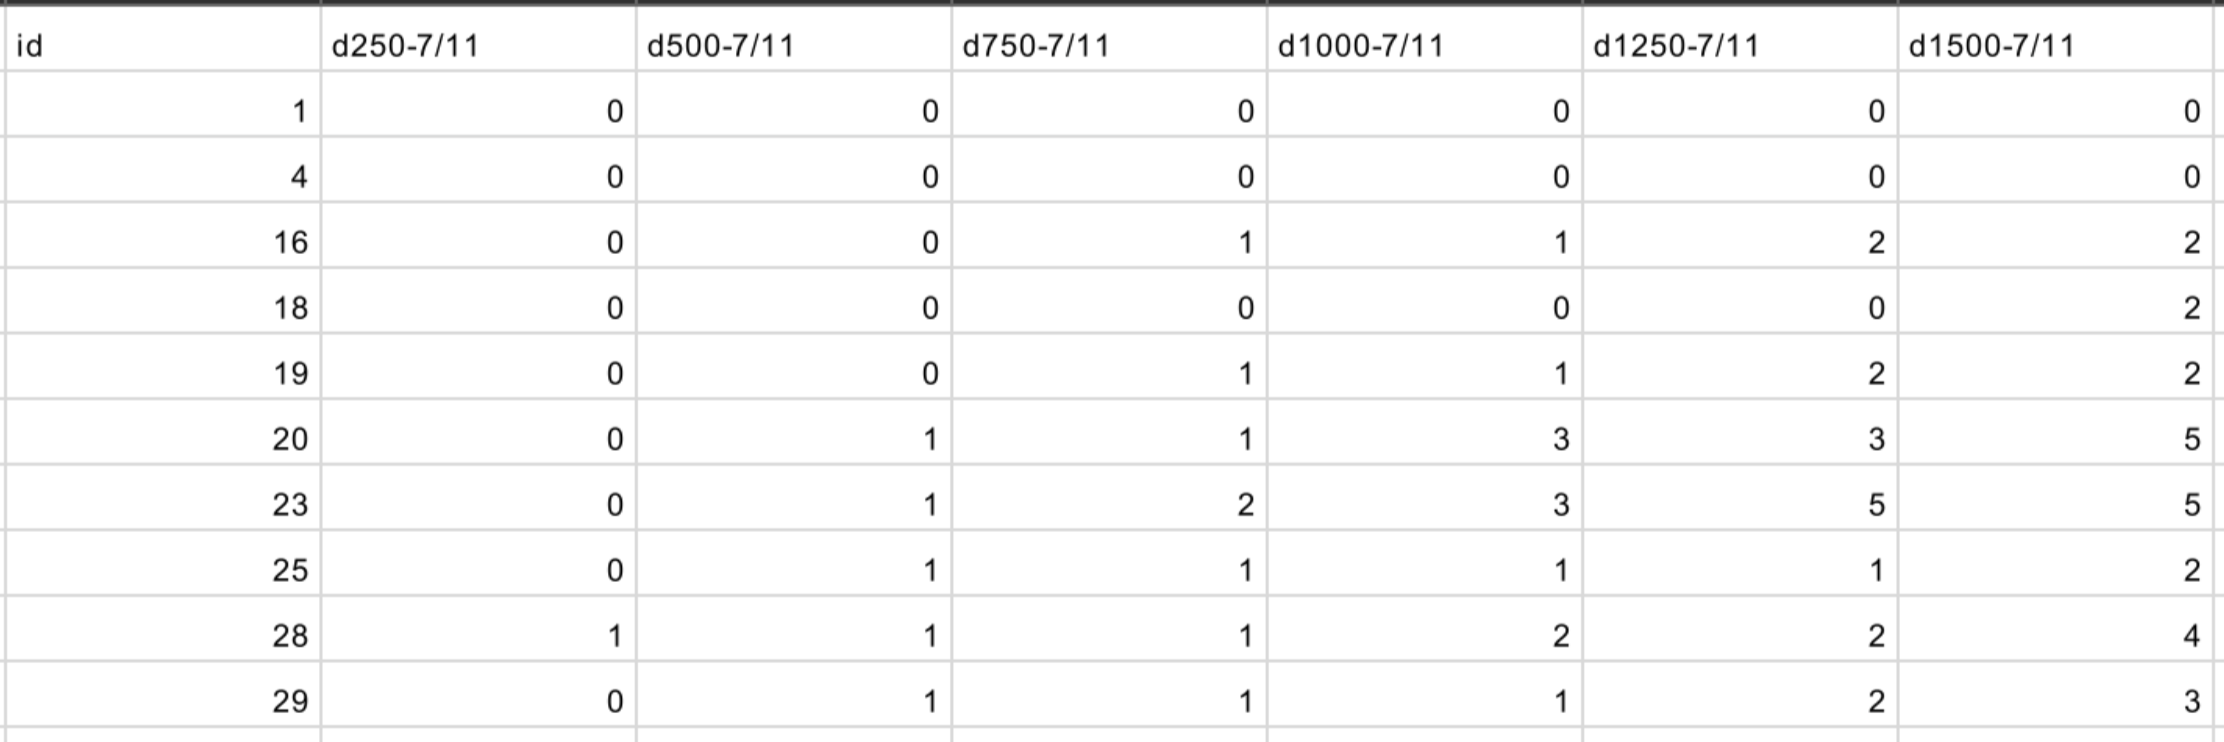

#ทำในคาบ

In [125]:
id = 25 #วนลูป int

In [126]:
this_home = home[home['post_id']== id]
this_home

,post_id,https://nayoo.co/khonkaen/posts/,type,post_type,listing_type,parent_id,draft_for,project_name,contact_name,province_id,...,cable_max,cable_free,cable_none,cable_ask,position_previous,position_current,sold_out_at,created_at,updated_at,deleted_at
0,25.0,https://nayoo.co/khonkaen/posts/25,post,secondhand,sale,NaN,NaN,กันยารัตน์ เดอวินเทจ,บริษัท กันยารัตน์ พร็อพเพอร์ตี้ จำกัด,6.0,...,NaN,NaN,NaN,NaN,991.0,991.0,NaT,2020-06-29 06:25:32,2021-10-10 15:58:05,NaN


In [127]:
h_lat=this_home['latitude'].values[0]
h_long=this_home['longitude'].values[0] #กำหนด lat,long

In [128]:
this_seven = seven_id[str(int(id))]

In [129]:
this_seven

[{'lat': 16.4229267, 'lng': 102.8712313},
 {'lat': 16.4255945, 'lng': 102.8397278},
 {'lat': 16.4251666, 'lng': 102.8510168},
 {'lat': 16.4075683, 'lng': 102.8597974},
 {'lat': 16.4198307, 'lng': 102.8496996},
 {'lat': 16.4236724, 'lng': 102.8434961},
 {'lat': 16.4059038, 'lng': 102.839094},
 {'lat': 16.4276489, 'lng': 102.867949},
 {'lat': 16.4276748, 'lng': 102.8632914},
 {'lat': 16.4285371, 'lng': 102.8496085},
 {'lat': 16.4187106, 'lng': 102.8405019},
 {'lat': 16.4289683, 'lng': 102.8471979},
 {'lat': 16.4288908, 'lng': 102.8559018},
 {'lat': 16.4288377, 'lng': 102.8542497},
 {'lat': 16.3990089, 'lng': 102.8381851},
 {'lat': 16.4289572, 'lng': 102.8477644},
 {'lat': 16.4268631, 'lng': 102.8371875}]

###คำนวณระยะทางระหว่าง แต่ละ 7-11 กับบ้าน

In [130]:
seven_dist=list()
loc1 = [h_lat, h_long]
for seven in this_seven:
  loc2 = [seven ['lat'],seven['lng']]
  dist = geopy.distance.geodesic(loc1,loc2).m
  seven_dist.append(dist)

In [131]:
seven_dist

[2026.3410640485051,
 2561.1300438835406,
 1802.022379353695,
 371.3607033942288,
 1362.068179007474,
 2122.0746378621734,
 2033.8379723813946,
 2226.324543949096,
 2028.9546247130654,
 2204.142864576839,
 2057.0874274932844,
 2358.161790753285,
 2078.784658007895,
 2095.8694500771535,
 2415.419008344456,
 2329.134777870196,
 2858.020875919802]

In [132]:
def cal_seven_radius(seven_dist_list,radius): #อีก1วิธี
  num = 0
  for seven in seven_dist_list:
    if seven < radius:
      num = num + 1
      return num

In [133]:
import numpy as np#อีก1วิธี

In [134]:
np.array(seven_dist) < 500 #เปรียบเทียบกับระยะทาง รัศมี

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [135]:
sum(np.array(seven_dist) < 500)

1

In [136]:
cal_seven_radius(seven_dist,500)

1

In [137]:
sum(np.array(seven_dist) < 2000)

3

In [138]:
record_list = list()

In [139]:
record_dict = {}
record_dict ['id'] = id
record_dict['d250-7/11'] = sum(np.array(seven_dist) < 250)
record_dict['d250-7/11'] = sum(np.array(seven_dist) < 500)
record_dict['d250-7/11'] = sum(np.array(seven_dist) < 750)
record_dict['d250-7/11'] = sum(np.array(seven_dist) < 1000)
record_dict['d250-7/11'] = sum(np.array(seven_dist) < 1250)
record_dict['d250-7/11'] = sum(np.array(seven_dist) < 1500)

In [140]:
record_dict

{'id': 25, 'd250-7/11': 2}

In [141]:
record_list.append(record_dict)

In [142]:
pd.DataFrame(record_list)

,id,d250-7/11
0,25,2


In [143]:
home['post_id']

0        25.0
1        33.0
2       495.0
3       564.0
4       566.0
       ...   
95    19495.0
96    19496.0
97    20164.0
98       31.0
99      570.0
Name: post_id, Length: 100, dtype: float64

In [144]:
record_list = list()
for id in home['post_id']: 
    print(id)
    this_home = home[home['post_id']==id] 
    h_lat = this_home['latitude'].values[0] #.values=ดึง
    h_long = this_home['longitude'].values[0] #กำหนด lat,long
    this_seven = seven_id[str(int(id))] 
    seven_dist=list() #วนลูปหาทุกๆ 7-11
    loc1 = [h_lat,h_long] #บ้านหลังเดิมเลยดึงออกมาไว้นอกลูป
    for seven in this_seven:
        loc2 = [seven['lat'],seven['lng']]
        dist = geopy.distance.geodesic(loc1,loc2).m
        seven_dist.append(dist)

    record_dict = {}
    record_dict['id'] = id 
    record_dict['d250-7/11'] = sum(np.array(seven_dist) < 250)
    record_dict['d500-7/11'] = sum(np.array(seven_dist) < 500)
    record_dict['d700-7/11'] = sum(np.array(seven_dist) < 700)
    record_dict['d21000-7/11'] = sum(np.array(seven_dist) < 1000)
    record_dict ['d21250-7/11' ] = sum(np.array(seven_dist) < 1250)
    record_dict['d1500-7/11'] = sum(np.array(seven_dist) < 1500)
    record_list.append(record_dict)


final_table = pd.DataFrame(record_list)

25.0
33.0
495.0
564.0
566.0
568.0
597.0
624.0
634.0
656.0
657.0
668.0
676.0
690.0
693.0
694.0
703.0
710.0
760.0
1070.0
1123.0
1128.0
1130.0
1135.0
1143.0
1149.0
1178.0
1402.0
1895.0
1915.0
1959.0
2033.0
2143.0
2244.0
2262.0
3286.0
3340.0
3357.0
3547.0
3617.0
3622.0
3721.0
3897.0
3905.0
5195.0
5978.0
5986.0
5994.0
6003.0
6007.0
6010.0
6017.0
6021.0
6022.0
6034.0
6045.0
6056.0
6069.0
7709.0
7713.0
7733.0
8514.0
8545.0
8682.0
8758.0
8950.0
9066.0
9141.0
9613.0
11264.0
12423.0
12680.0
12710.0
12759.0
13113.0
17128.0
17690.0
17754.0
17755.0
17778.0
17789.0
18092.0
18101.0
18112.0
18305.0
18629.0
18633.0
19450.0
19475.0
19478.0
19480.0
19481.0
19483.0
19492.0
19494.0
19495.0
19496.0
20164.0
31.0
570.0


In [145]:
final_table

,id,d250-7/11,d500-7/11,d700-7/11,d21000-7/11,d21250-7/11,d1500-7/11
0,25.0,0,1,1,1,1,2
1,33.0,0,1,2,3,5,5
2,495.0,0,0,0,2,2,3
3,564.0,0,0,2,4,8,12
4,566.0,0,1,2,3,4,4
...,...,...,...,...,...,...,...
95,19495.0,0,2,3,7,10,14
96,19496.0,0,0,0,1,4,9
97,20164.0,1,1,2,4,7,9
98,31.0,0,0,0,3,3,4


In [146]:
for i in ['post_id','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking','project_name','district','zone','street','sell_price','d250-7/11','d500-7/11','d750-7/11','d1000-7/11','d1250-7/11','d1500-7/11']:
    print(i)

post_id
number_of_rai
number_of_ngan
number_of_va
number_of_story
number_of_bedroom
number_of_bathroom
direction
furniture
usable_area
number_of_parking
project_name
district
zone
street
sell_price
d250-7/11
d500-7/11
d750-7/11
d1000-7/11
d1250-7/11
d1500-7/11


In [147]:
home1 = home[['post_id','number_of_rai','number_of_ngan','number_of_va','number_of_story','number_of_bedroom','number_of_bathroom','direction','furniture','usable_area','number_of_parking','project_name','district','zone','street','sell_price']]

In [148]:
finaltable = home1.merge(final_table, how ='left', left_on='post_id',right_on='id')

In [149]:
del finaltable['id']

In [150]:
finaltable

,post_id,number_of_rai,number_of_ngan,number_of_va,number_of_story,number_of_bedroom,number_of_bathroom,direction,furniture,usable_area,...,district,zone,street,sell_price,d250-7/11,d500-7/11,d700-7/11,d21000-7/11,d21250-7/11,d1500-7/11
0,25.0,0.0,0.0,63.8,1.0,3.0,2.0,0.0,0.0,135.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,2700000.0,0,1,1,1,1,2
1,33.0,0.0,0.0,61.1,1.0,2.0,2.0,0.0,0.0,112.0,...,เมืองขอนแก่น,กลางเมือง-เมืองเก่า-กุดกว้าง,NaN,2600000.0,0,1,2,3,5,5
2,495.0,NaN,3.0,12.8,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,โพธิสาร,5900000.0,0,0,0,2,2,3
3,564.0,NaN,NaN,85.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,NaN,4400000.0,0,0,2,4,8,12
4,566.0,NaN,NaN,65.0,NaN,0.0,NaN,0.0,0.0,0.0,...,เมืองขอนแก่น,ทุ่งสร้าง-ศรีจันทร์-ราชมงคล,ศรีจันทร์,2750000.0,0,1,2,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,19495.0,0.0,1.0,76.2,2.0,0.0,0.0,0.0,0.0,193.0,...,เมืองขอนแก่น,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,5500000.0,0,2,3,7,10,14
96,19496.0,0.0,2.0,56.8,1.0,0.0,0.0,0.0,0.0,0.0,...,เมืองขอนแก่น,โนนทัน-บึงแก่นนคร,NaN,7911000.0,0,0,0,1,4,9
97,20164.0,0.0,1.0,2.0,1.0,4.0,2.0,0.0,0.0,0.0,...,เมืองขอนแก่น,สามเหลี่ยม-กังสดาล-ม.ขอนแก่น,NaN,2990000.0,1,1,2,4,7,9
98,31.0,0.0,0.0,55.8,2.0,3.0,2.0,0.0,0.0,188.0,...,เมืองขอนแก่น,โนนม่วง-มข.-เลี่ยงเมือง-โนนเรือง,ถนนมิตรภาพ(ทล.2) กม.6+150,4000000.0,0,0,0,3,3,4


#HW

In [151]:
import geopy.distance #หาระยะห่างระหว่างจุด 2 จุด

In [152]:
#วนลูปหาตำแหน่งที่ตั้งของทุก id    // ดูว่ามีเซเว่นอยู่ตรงไหนบ้าง
seven_id = {} #สร้าง dict ขึ้นมา  // เพื่อรวบรวม list ของเเต่ละโลเคชั่นไว้// เก็บไว้ เพื่อจะได้เรียกดูได้ว่าอันไหนที่มีไอดีเหมือนกันบ้้าง
for t in this_json:
    l = list()  
    for x in this_json[t]:
        l.append(x['geometry']['location'])
    print(t) # t = id
    print(l)
    seven_id[t] = l  # dict id = t สมาชิกคือ l

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
6284
[]
6285
[{'lat': 16.3280289, 'lng': 102.8466104}]
6286
[]
6289
[]
6290
[]
6291
[{'lat': 16.760925, 'lng': 102.6348166}]
6292
[{'lat': 16.3280289, 'lng': 102.8466104}]
6296
[{'lat': 16.5219606, 'lng': 102.219816}]
6297
[]
6298
[{'lat': 16.4501543, 'lng': 102.7382279}, {'lat': 16.4481776, 'lng': 102.7736213}, {'lat': 16.4496233, 'lng': 102.7578029}, {'lat': 16.4512684, 'lng': 102.7517798}]
6302
[]
6306
[]
6310
[]
6311
[]
6313
[{'lat': 16.4506978, 'lng': 102.7955315}, {'lat': 16.4786388, 'lng': 102.814293}, {'lat': 16.4794698, 'lng': 102.8070934}, {'lat': 16.4423, 'lng': 102.808299}, {'lat': 16.4802561, 'lng': 102.8118345}, {'lat': 16.4800345, 'lng': 102.817991}, {'lat': 16.4800801, 'lng': 102.8157501}, {'lat': 16.4421359, 'lng': 102.8198991}, {'lat': 16.4781927, 'lng': 102.8199828}, {'lat': 16.4463944, 'lng': 102.8200097}]
6316
[]
6319
[{'lat': 16.7035329, 'lng': 103.0785806}, {'lat': 16.7009297, 'lng': 103.0838363}, {'lat': 1

In [153]:
seven_id 

{'1': [],
 '4': [],
 '6': [{'lat': 16.0603149, 'lng': 102.7264856},
  {'lat': 16.0564741, 'lng': 102.7268436},
  {'lat': 16.0595413, 'lng': 102.7294307},
  {'lat': 16.0751998, 'lng': 102.7356017},
  {'lat': 16.070648, 'lng': 102.7344055},
  {'lat': 16.0582995, 'lng': 102.7360953},
  {'lat': 16.0573901, 'lng': 102.7192322}],
 '7': [],
 '9': [],
 '11': [{'lat': 15.809535, 'lng': 102.6069684},
  {'lat': 15.8193062, 'lng': 102.6012589},
  {'lat': 15.8125848, 'lng': 102.6009202},
  {'lat': 15.8102763, 'lng': 102.5985417},
  {'lat': 15.8095537, 'lng': 102.5879272},
  {'lat': 15.7970035, 'lng': 102.6075296}],
 '16': [{'lat': 16.1340329, 'lng': 102.5331697},
  {'lat': 16.1294298, 'lng': 102.540669}],
 '17': [{'lat': 16.4052438, 'lng': 102.7823961},
  {'lat': 16.3898169, 'lng': 102.8053144},
  {'lat': 16.4221806, 'lng': 102.8047853},
  {'lat': 16.4083692, 'lng': 102.7948258},
  {'lat': 16.4053255, 'lng': 102.7746538}],
 '18': [{'lat': 16.4506978, 'lng': 102.7955315},
  {'lat': 16.445794, 'lng':

In [154]:
# สร้าง dict เก็บ เฉพาะค่า latitude ของเซเว่น  
this_lat_seven = {}
for t in seven_id: #วนแต่ละ ID
  l = list()
  for x in seven_id[t]: 
    l.append(x['lat'])

    this_lat_seven[t] = l # dict id = t สมาชิกคือ l
    


In [155]:
this_lat_seven 

{'6': [16.0603149,
  16.0564741,
  16.0595413,
  16.0751998,
  16.070648,
  16.0582995,
  16.0573901],
 '11': [15.809535, 15.8193062, 15.8125848, 15.8102763, 15.8095537, 15.7970035],
 '16': [16.1340329, 16.1294298],
 '17': [16.4052438, 16.3898169, 16.4221806, 16.4083692, 16.4053255],
 '18': [16.4506978,
  16.445794,
  16.4410003,
  16.4600404,
  16.4421359,
  16.4512089,
  16.4423,
  16.464662,
  16.4656851,
  16.4463944,
  16.4622829,
  16.4781927,
  16.4777682,
  16.4786388,
  16.4740341],
 '19': [16.4506978,
  16.4342316,
  16.4362708,
  16.4379979,
  16.4423,
  16.4421359,
  16.4410003,
  16.4463944],
 '20': [16.4795285,
  16.4855339,
  16.4977439,
  16.4742375,
  16.4775008,
  16.4734596,
  16.4608219],
 '21': [16.4349258,
  16.4278369,
  16.4255945,
  16.4251666,
  16.4522591,
  16.4365317,
  16.445794,
  16.4285371,
  16.4224502,
  16.4410003,
  16.4198307,
  16.4379367,
  16.448722,
  16.4526191,
  16.4236724,
  16.4212506,
  16.4254985,
  16.4261997,
  16.4289683,
  16.4297509

In [156]:
# สร้าง dict เก็บ เฉพาะค่า longitude ของเซเว่น  
this_lng_seven = {}
for t in seven_id: #วนแต่ละ ID
  l = list()
  for x in seven_id[t]: 
    l.append(x['lng'])

    this_lng_seven[t] = l # dict id = t สมาชิกคือ l

In [157]:
this_lng_seven

{'6': [102.7264856,
  102.7268436,
  102.7294307,
  102.7356017,
  102.7344055,
  102.7360953,
  102.7192322],
 '11': [102.6069684,
  102.6012589,
  102.6009202,
  102.5985417,
  102.5879272,
  102.6075296],
 '16': [102.5331697, 102.540669],
 '17': [102.7823961, 102.8053144, 102.8047853, 102.7948258, 102.7746538],
 '18': [102.7955315,
  102.8242206,
  102.8216208,
  102.8247777,
  102.8198991,
  102.795423,
  102.808299,
  102.8251211,
  102.8249423,
  102.8200097,
  102.8270049,
  102.8199828,
  102.8235898,
  102.814293,
  102.8262668],
 '19': [102.7955315,
  102.8145643,
  102.7997081,
  102.7868055,
  102.808299,
  102.8198991,
  102.8216208,
  102.8200097],
 '20': [102.8682111,
  102.8430875,
  102.8364985,
  102.8595134,
  102.8558385,
  102.8586857,
  102.85698],
 '21': [102.8359298,
  102.8334892,
  102.8397278,
  102.8510168,
  102.8310143,
  102.8491264,
  102.8242206,
  102.8496085,
  102.8345664,
  102.8216208,
  102.8496996,
  102.8278648,
  102.841044,
  102.8318613,
  10

In [158]:
home['post_id'] = home['post_id'].astype('int').astype('str')


In [159]:
Home = home[['post_id','latitude','longitude']]
Home

,post_id,latitude,longitude
0,25,16.410179,102.857613
1,33,16.401504,102.840823
2,495,16.413045,102.855357
3,564,16.423740,102.859300
4,566,16.421460,102.868600
...,...,...,...
95,19495,16.454673,102.830278
96,19496,16.411927,102.843138
97,20164,16.436792,102.829835
98,31,16.495614,102.827584


In [160]:
Homelat = Home.set_index('post_id')['latitude'].to_dict()

In [161]:
Homelat

{'25': 16.4101787,
 '33': 16.40150392,
 '495': 16.413045,
 '564': 16.42374,
 '566': 16.42146,
 '568': 16.4075,
 '597': 15.95734,
 '624': 16.40742,
 '634': 16.40913,
 '656': 16.44089,
 '657': 16.41134,
 '668': 16.41029,
 '676': 16.41265,
 '690': 16.41161,
 '693': 16.41064,
 '694': 16.41128,
 '703': 16.42362,
 '710': 16.4106,
 '760': 16.41308,
 '1070': 16.455662,
 '1123': 16.456804,
 '1128': 16.42762,
 '1130': 16.408694,
 '1135': 16.447731,
 '1143': 16.407063,
 '1149': 16.444951,
 '1178': 16.489706,
 '1402': 16.4054985598157,
 '1895': 16.3978695679627,
 '1915': 16.4631704334651,
 '1959': 16.4425541877312,
 '2033': 16.5026165423108,
 '2143': 16.407831,
 '2244': 16.458807,
 '2262': 16.43489,
 '3286': 16.4465055342849,
 '3340': 16.434119,
 '3357': 16.424755,
 '3547': 16.4049197582653,
 '3617': 16.4250854,
 '3622': 16.407831,
 '3721': 16.4465055342849,
 '3897': 16.437597,
 '3905': 16.4511976538381,
 '5195': 16.4319345454142,
 '5978': 16.411098,
 '5986': 16.426519,
 '5994': 16.420299,
 '6003'

In [162]:
Homelng = Home.set_index('post_id')['longitude'].to_dict()

In [163]:
Homelng

{'25': 102.8576126,
 '33': 102.840823,
 '495': 102.855357,
 '564': 102.8593,
 '566': 102.8686,
 '568': 102.8492,
 '597': 102.5385,
 '624': 102.849,
 '634': 102.8256,
 '656': 102.8382,
 '657': 102.859,
 '668': 102.858,
 '676': 102.854,
 '690': 102.8621,
 '693': 102.8579,
 '694': 102.8621,
 '703': 102.8595,
 '710': 102.8612,
 '760': 102.8536,
 '1070': 102.838937,
 '1123': 102.855244,
 '1128': 102.829592,
 '1130': 102.843573,
 '1135': 102.846258,
 '1143': 102.847508,
 '1149': 102.821325,
 '1178': 102.856855,
 '1402': 102.8416973393,
 '1895': 102.834019078196,
 '1915': 102.839050262565,
 '1959': 102.847687615336,
 '2033': 102.833102569471,
 '2143': 102.842839,
 '2244': 102.858251,
 '2262': 102.86342,
 '3286': 102.837387932719,
 '3340': 102.862994,
 '3357': 102.802524,
 '3547': 102.845477475108,
 '3617': 102.8507333,
 '3622': 102.842839,
 '3721': 102.842194451274,
 '3897': 102.85,
 '3905': 102.7777570619,
 '5195': 102.772499932231,
 '5978': 102.833206,
 '5986': 102.841945,
 '5994': 102.8171

In [164]:
def distance(latH,lngH,latS,lngS):
  #latH = Home['latitude']
  #lngH = Home['longitude']
  #latS = this_lat_seven
  #lngS = this_lng_seven
  loc1 = [latH, lngH]
  loc2 = [latS,lngS]
  return geopy.distance.geodesic(loc1,loc2).m

In [165]:
len(Home)

100

In [166]:
range(len(Home))

range(0, 100)

In [167]:
Home

,post_id,latitude,longitude
0,25,16.410179,102.857613
1,33,16.401504,102.840823
2,495,16.413045,102.855357
3,564,16.423740,102.859300
4,566,16.421460,102.868600
...,...,...,...
95,19495,16.454673,102.830278
96,19496,16.411927,102.843138
97,20164,16.436792,102.829835
98,31,16.495614,102.827584


In [169]:
finaltable.to_csv('finaltable_clean.csv', index=False)